# 03701 HW5

## Amy Ji October 3rd, 2025

In [1]:
import pandas as pd
import numpy as np
import csv
import re
import matplotlib.pyplot as plt

### 1. Chapter5 (5.9.1)

In [2]:
with open ("../../../regex/data/bee_list.txt") as f:
    bee_list = csv.DictReader(f, delimiter = "\t")
    species = []
    authors = []
    for r in bee_list:
        species.append(r['Scientific Name'])
        authors.append(r['Taxon Author'])   


In [3]:
name = re.compile(r'\(?([\w\s,\.\-\&]*),\s(\d{4})\)?')

In [4]:

def extract_list_au_year(au):
    text = re.match(name, au)
    authorlist = text.group(1)
    year = text.group(2)
    # split authors into a list using re.split
    authorlist = re.split(r', | \& ', authorlist)
    # Translation: either separate using ', ' or ' & '
    return [authorlist, year]


In [5]:

dict_years = {}
dict_authors = {}
for au in authors:
    text = extract_list_au_year(au)
    for aunum in text[0]:
        if aunum in dict_authors.keys():
            dict_authors[aunum] = dict_authors[aunum] + 1 
        else:
            dict_authors[aunum] =  1 
    if text[1] in dict_years.keys():
        dict_years[text[1]] = dict_years[text[1]] + 1 
    else:
        dict_years[text[1]] =  1 


In [6]:
# Find the author with the most entries
max_value_author = max(dict_authors.values())
which_index = list(dict_authors.values()).index(max_value_author)
list(dict_authors.keys())[which_index]

'Cockerell'

In [7]:
# Find the year with the most entries
max_value_year = max(dict_years.values())
which_index = list(dict_years.values()).index(max_value_year)
list(dict_years.keys())[which_index]

'1903'

### 1. Chapter5 (5.9.2)

In [8]:
with open ("../../../regex/data/MapOfScience/pubmed_results.txt") as f:
    my_text = f.read()

In [9]:
my_text = re.sub(r'\n\s{6}', ' ', my_text)
zipcodes = re.findall(r'[A-Z]{2}\s(\d{5}), USA', my_text)
unique_zipcodes = list(set(zipcodes))

In [10]:
zip_coordinates = {}
with open('../../../regex/data/MapOfScience/zipcodes_coordinates.txt') as f:
    csvr = csv.DictReader(f)
    for row in csvr:
        zip_coordinates[row['ZIP']] = [float(row['LAT']), 
                                       float(row['LNG'])]

In [11]:
zip_code = []
zip_long = []
zip_lat = []
zip_count = []

In [12]:
for z in unique_zipcodes:
    if z in zip_coordinates.keys():
        zip_code.append(z)
        zip_lat.append(zip_coordinates[z][0])
        zip_long.append(zip_coordinates[z][1])
        zip_count.append(zipcodes.count(z))

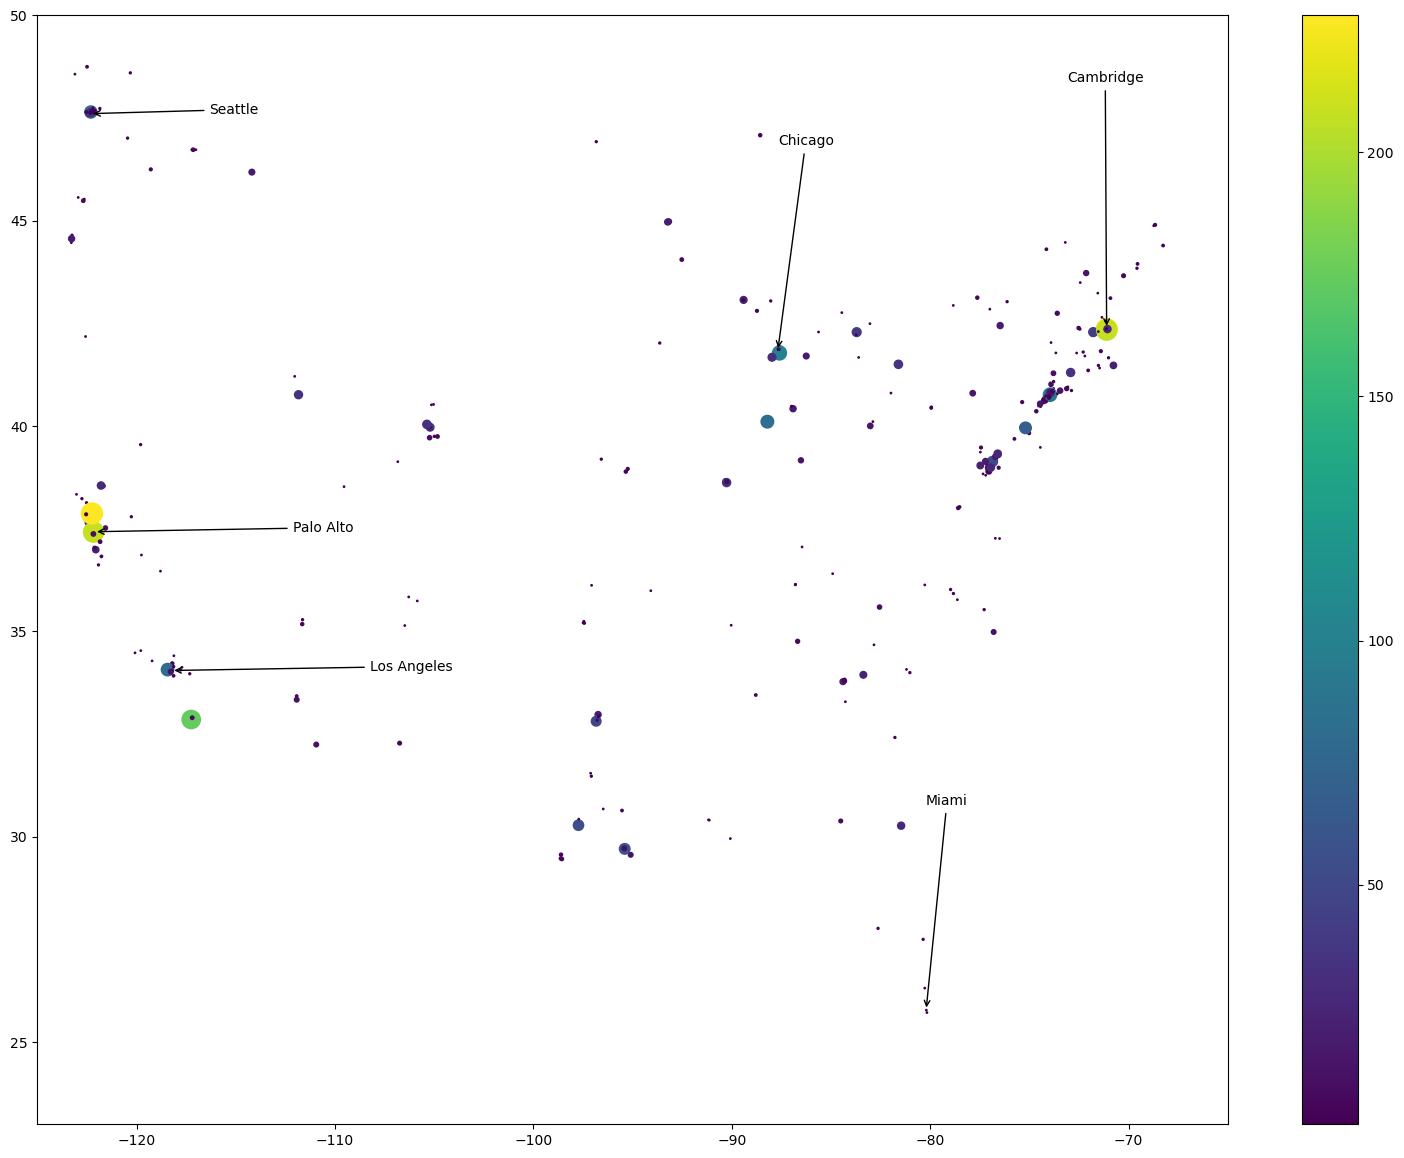

In [13]:

%matplotlib inline
plt.scatter(zip_long, zip_lat, s = zip_count, c= zip_count)
plt.colorbar()
# only continental us without Alaska
plt.xlim(-125,-65)
plt.ylim(23, 50)
# add a few cities for reference (optional)
ard = dict(arrowstyle="->")
plt.annotate('Los Angeles', xy = (-118.25, 34.05), 
               xytext = (-108.25, 34.05), arrowprops = ard)
plt.annotate('Palo Alto', xy = (-122.1381, 37.4292), 
               xytext = (-112.1381, 37.4292), arrowprops= ard)
plt.annotate('Cambridge', xy = (-71.1106, 42.3736), 
               xytext = (-73.1106, 48.3736), arrowprops= ard)
plt.annotate('Chicago', xy = (-87.6847, 41.8369), 
               xytext = (-87.6847, 46.8369), arrowprops= ard)
plt.annotate('Seattle', xy = (-122.33, 47.61), 
               xytext = (-116.33, 47.61), arrowprops= ard)
plt.annotate('Miami', xy = (-80.21, 25.7753), 
               xytext = (-80.21, 30.7753), arrowprops= ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.show()



### 2. Calcium Curve Analysis Part II a: 

In [14]:
caCurve = pd.read_excel("calcium_curves.xlsx", header = 1)
caCurve

,Intensity Mean,Unit,Category,Channel,Image,Time,Set 1,TrackID,ID
0,817.684021,NaN,Spot,1,Image 1,1,Class B,1000078592,78592
1,734.706970,NaN,Spot,1,Image 1,1,Class B,1000078593,78593
2,769.390015,NaN,Spot,1,Image 1,1,Class B,1000078596,78596
3,743.325012,NaN,Spot,1,Image 1,1,Class B,1000078605,78605
4,753.684021,NaN,Spot,1,Image 1,1,Class B,1000078612,78612
...,...,...,...,...,...,...,...,...,...
28935,1016.309998,NaN,Spot,1,Image 1,121,Class B,1000094095,157138
28936,876.570984,NaN,Spot,1,Image 1,121,Class B,1000124400,157140
28937,1064.250000,NaN,Spot,1,Image 1,121,Class B,1000079324,157142
28938,832.604980,NaN,Spot,1,Image 1,121,Class B,1000119112,157150


In [15]:
print(set[caCurve["TrackID"]])

set[0        1000078592
1        1000078593
2        1000078596
3        1000078605
4        1000078612
            ...    
28935    1000094095
28936    1000124400
28937    1000079324
28938    1000119112
28939    1000119113
Name: TrackID, Length: 28940, dtype: int64]


#### i. Define a function to check if values in an array are consecutive.

In [16]:
def checkConsecutive (List):
    return set(List) == set(range(min(List), max(List)+1))

In [17]:
trackid_time_map = {}

for tid, group in caCurve.groupby("TrackID"):
    times = group["Time"].dropna().astype(int).tolist()
    times.sort()
    trackid_time_map[tid] = times

#### ii. Create an empty DataFrame with column names "Intensity Mean", "Time", "TrackID".

In [18]:
newCurve = pd.DataFrame(columns=["Intensity Mean", "Time", "TrackID"])

#### iii. For each unique 'TrackID', assess whether the corresponding 'Time' is consecutive using the function defined in step i.
#### iv. For 'TrackID' where 'Time' is consecutive, store "Intensity Mean", "Time", "TrackID" in the new DataFrame created in step ii.
#### v. For 'TrackID' with non-consecutive 'Time', make 'Time' consecutive by filling in the gaps with mean values of the preceding and succeeding time points. Hint: use the np.interp() function.
#### vi. Print the size of the new DataFrame. Compare it with the size of the original DataFrame where “Time” is not consecutive.

In [19]:
# Make a copy of newCurve, otherwise the rows will be added repetitively if we rerun this code block. 
continuousList = newCurve.copy()

for tid, timelist in trackid_time_map.items(): 
    # if checkConsecutive returns True.
    if checkConsecutive(timelist):
        # Find all rows in caCurve where TrackID matches tid (which has consecutive time), and concatenate the columns to newCurve.
        subset = caCurve[caCurve["TrackID"] == tid][["Intensity Mean", "Time", "TrackID"]]
        subset = subset.dropna(subset=["Time", "Intensity Mean"])
        continuousList = pd.concat([continuousList, subset], ignore_index=True)

    # Else if checkConsecutive returns False.
    else:
        subset = caCurve[caCurve["TrackID"] == tid][["Intensity Mean", "Time", "TrackID"]].copy()
        subset = subset.dropna(subset=["Time", "Intensity Mean"])

        # Extract Time and Intensity Mean column. Deal with them separately
        time_val = subset["Time"].astype(float).to_numpy()
        intensity_val = subset["Intensity Mean"].astype(float).to_numpy()

        # Use np.arange to create a full time array (inclusive of max time)
        t_min = min(time_val)
        t_max = max(time_val)
        time_full = np.arange(t_min, t_max + 1, dtype=int)

        # Use np.interp to fill in the gaps.
        # time_full: positions of new values
        # time_val: observed x-coordinates
        # intensity_val: observed y-coordinates
        intensity_full = np.interp(time_full, time_val, intensity_val)

        # Create a new but temporary df to store the filled values. 
        fullList = pd.DataFrame({
            "Time": time_full,
            "Intensity Mean": intensity_full,
            "TrackID": tid
        })

        # Concatenate the filled value (fullList) to continuousList
        continuousList = pd.concat([continuousList, fullList], ignore_index=True)

print("Original rows (caCurve, non-consecutive):", len(caCurve))
print("New rows (continuousList):", len(continuousList))
print("Rows added:", len(continuousList) - len(caCurve))
print(continuousList)


/var/folders/84/bhlbr2fs55j_dm3_7k2vcpwr0000gn/T/ipykernel_14045/2440483710.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  continuousList = pd.concat([continuousList, subset], ignore_index=True)


Original rows (caCurve, non-consecutive): 28940
New rows (continuousList): 30581
Rows added: 1641
       Intensity Mean Time     TrackID
0          817.684021    1  1000078592
1          866.911987    2  1000078592
2          907.570007    3  1000078592
3          929.346985    4  1000078592
4          912.531982    5  1000078592
...               ...  ...         ...
30576      939.215027  117  1000153651
30577      965.674988  118  1000153651
30578      969.338013  119  1000153651
30579      921.359009  120  1000153651
30580      979.179993  121  1000153651

[30581 rows x 3 columns]


### 2. Calcium Curve Analysis Part II b:

#### i. Select TrackID that has more than 20 Time points and store them in a new DataFrame. Any TrackID that has less than 20-time points will not be further analyzed. 

In [20]:
# group continuousList by TrackID and count the number of Time each ID has. (This returns a pandas series)
countTime = continuousList.groupby(['TrackID'])["Time"].count()

# Convert the pandas series into a datafream for further modification. 
countTime = countTime.to_frame(name = "TimeCount").reset_index()

# Select TrackID that has a time count of larger than 20. 
ids_over20 = countTime["TrackID"][countTime["TimeCount"] > 20]

# If the id in continuousList is also in ids_over20, locate the three columns from continuousList. 
continuousList_over20 = continuousList.loc[continuousList["TrackID"].isin(ids_over20),["Intensity Mean", "Time", "TrackID"]]


#### ii. Smooth the ‘Intensity Mean’ curve. We can do this by calculating the moving mean of ‘Intensity Mean’. Hint: calculate the moving mean of a column in a DataFrame df by df[‘column name’].rolling(window=windowsize, min_periods=1).mean()   You can use windowsize=5 here.  

In [21]:
continuousList_over20["Smooth Intensity Mean"] = continuousList_over20["Intensity Mean"].rolling(window = 5, min_periods = 1).mean()
print (continuousList_over20)

       Intensity Mean Time     TrackID  Smooth Intensity Mean
0          817.684021    1  1000078592             817.684021
1          866.911987    2  1000078592             842.298004
2          907.570007    3  1000078592             864.055339
3          929.346985    4  1000078592             880.378250
4          912.531982    5  1000078592             886.808997
...               ...  ...         ...                    ...
30237      917.013000  117  1000145701             962.158215
30238      941.820007  118  1000145701             944.866211
30239      956.526001  119  1000145701             938.928809
30240      966.359009  120  1000145701             948.720605
30241      941.921021  121  1000145701             944.727808

[28554 rows x 4 columns]


#### iii. Take the derivative of the “smooth” ‘Intensity Mean’ for TrackID from i.

#### iv. Add ‘smooth’ ‘Intensity Mean’ from ii and the derivatives you got in iii as new columns in the DataFrame you created in i.

In [22]:
# Create an empty column "Derivatives" for storaging the values.
continuousList_over20["Derivatives"] = np.nan  

# Each id per sub-DataFrame. Loop through each sub-DataFrame.
for tid, g in continuousList_over20.groupby("TrackID"):
    grad_vals = np.gradient(
        g["Smooth Intensity Mean"].to_numpy(),
        g["Time"].to_numpy()
    )
    # assign back directly into the right rows using .loc and group index
    continuousList_over20.loc[g.index, "Derivatives"] = grad_vals

print (continuousList_over20)

       Intensity Mean Time     TrackID  Smooth Intensity Mean  Derivatives
0          817.684021    1  1000078592             817.684021    24.613983
1          866.911987    2  1000078592             842.298004    23.185659
2          907.570007    3  1000078592             864.055339    19.040123
3          929.346985    4  1000078592             880.378250    11.376829
4          912.531982    5  1000078592             886.808997    12.439268
...               ...  ...         ...                    ...          ...
30237      917.013000  117  1000145701             962.158215    -6.922205
30238      941.820007  118  1000145701             944.866211   -11.614703
30239      956.526001  119  1000145701             938.928809     1.927197
30240      966.359009  120  1000145701             948.720605     2.899500
30241      941.921021  121  1000145701             944.727808    -3.992798

[28554 rows x 5 columns]


#### v. From TrackID 1000078624, plot ‘Intensity Mean’, smooth ‘Intensity Mean’, and derivatives.

In [23]:
ID78624 = continuousList_over20.loc[continuousList_over20["TrackID"] == 1000078624]

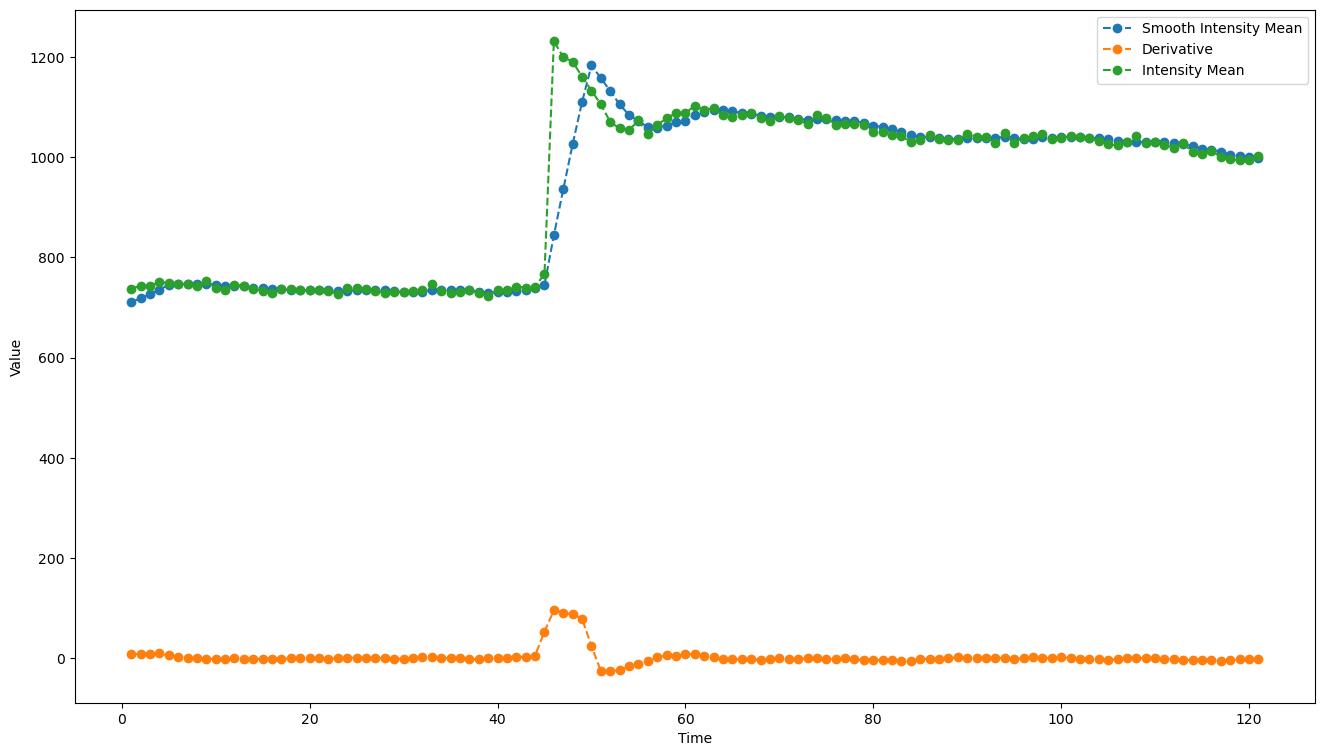

In [24]:
# Create figure 
plt.figure(figsize=(16,9))

# Plot with time stamps on the x-axis and values on the y-axis.
plt.plot(ID78624["Time"], ID78624["Smooth Intensity Mean"], 'o--',label = "Smooth Intensity Mean")
plt.plot(ID78624["Time"], ID78624["Derivatives"], 'o--', label = "Derivative")
plt.plot(ID78624["Time"], ID78624["Intensity Mean"], 'o--',label = "Intensity Mean")

# Label and legends
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()

# Display the plot
plt.show()

## 3. Restriction Enzyme Sequence Motif

In [25]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio import Align

In [26]:
# Open the fasta file with a handle
with open("pGL3.fa", "r") as handle:
    # Parse the fasta using SeqIO
    for record in SeqIO.parse(handle, "fasta"):
        seq = str(record.seq)
        print("Description:", record.description)
        print("Length:", len(seq))
        print(seq[:100])
# Close the handle.
handle.close()

Description: PGL3_promega
Length: 4888
AATATGTCCTTACAAATAGAAATGGGTCTTTACACTTATCTAAGATTTTTCCTAAATCGACGCAACTGTAGGTACCGAGCTCTTACGCGTGCTAGCCCGG


#### Write python code to read the plasmid sequence and returns the number and locations of matches to each the following restriction enzymes:

    - ApoI (motif 5' RAATTY 3'; note that R = A or G, Y = T or C), BsaI (motif 5' GGTCTC 3'), and DpnI (GATC)
    
    - Your script should search for both positive (sense) and negative (antisense) strand matches (NOTE: not all sites are palindromes).

In [27]:
enzymes = {"ApoI":r"[AG]AATT[CT]", #palindrom
           "Bsal":r"GGTCTC",
           "Bsal_anti": r"CCAGAG", # I just manually reversed the sequence.
           "Dpnl":r"GATC"} #palindrom

In [28]:
for name, pattern in enzymes.items():
    print(f"{name} sites:")
    # compile a regular expression pattern into a regular expression object. 
    # This object can then be used to perform various regular expression operations, such as searching, matching, and replacing, on strings.
    regex = re.compile(pattern)
    # This list is created within the loop because we need a list for every sequence.
    positions =[]
    for pos in range(len(seq) - len(pattern) + 1):
        # match motif starting at this position
        if regex.match(seq, pos):
            # We say that the enzyme cuts in the middle. 
            # I assume the cut position to be the start position of the restriction sequence + half of the length of the sequence. 
            positions.append(pos + int(len(pattern)/2))
    print(positions)

ApoI sites:
[566, 1922, 4560, 4571]
Bsal sites:
[]
Bsal_anti sites:
[706, 824]
Dpnl sites:
[108, 115, 740, 757, 828, 1281, 1649, 1769, 1799, 2076, 2898, 2973, 2984, 2992, 3070, 3082, 3187, 3528, 3546, 3592, 3850, 3867, 3903, 4638]


#### 
    - Finally, include code to digest with all three enzymes simultaneously

In [30]:
# Create an empty list to store positions of cut sites.
# This is created outside the loop to avoid being added repeatingly. 
all_sites = []

# Same as the previous loop
for _, pattern in enzymes.items():
    regex = re.compile(pattern)
    for pos in range(len(seq) - len(pattern)):
        if regex.match(seq, pos):
            all_sites.append(pos + int(len(pattern)/2))

# Simultaneous digest
# all_cuts is a set of positions of cuts made by all three enzymes (convert to set to avooid repitition).
all_cuts = sorted(set(all_sites))

# This is basically the union of cut sites in the previous questions.
print("Cuts:", all_cuts)


Cuts: [108, 115, 566, 706, 740, 757, 824, 828, 1281, 1649, 1769, 1799, 1922, 2076, 2898, 2973, 2984, 2992, 3070, 3082, 3187, 3528, 3546, 3592, 3850, 3867, 3903, 4560, 4571, 4638]
